In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string

In [2]:
df = pd.read_csv("word2lemma.dat", on_bad_lines="skip", sep="\t")

In [3]:
df

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ,0
0,' пр. ',прочий,ПРИЛАГАТЕЛЬНОЕ,0
1,100%,100%,НАРЕЧИЕ,0
2,2хдневная,2хдневный,ПРИЛАГАТЕЛЬНОЕ,0
3,2хдневного,2хдневный,ПРИЛАГАТЕЛЬНОЕ,0
4,2хдневное,2хдневный,ПРИЛАГАТЕЛЬНОЕ,0
...,...,...,...,...
2760400,ящурными,ящурный,ПРИЛАГАТЕЛЬНОЕ,0
2760401,ящурных,ящурный,ПРИЛАГАТЕЛЬНОЕ,0
2760402,ящурок,ящурка,СУЩЕСТВИТЕЛЬНОЕ,0
2760403,ящуром,ящур,СУЩЕСТВИТЕЛЬНОЕ,0


In [4]:
df.shape

(2760405, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760405 entries, 0 to 2760404
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ' др. '         object
 1   другой          object
 2   ПРИЛАГАТЕЛЬНОЕ  object
 3   0               int64 
dtypes: int64(1), object(3)
memory usage: 84.2+ MB


In [6]:
df.drop('0', inplace=True, axis=1)

In [7]:
df.head()

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ
0,' пр. ',прочий,ПРИЛАГАТЕЛЬНОЕ
1,100%,100%,НАРЕЧИЕ
2,2хдневная,2хдневный,ПРИЛАГАТЕЛЬНОЕ
3,2хдневного,2хдневный,ПРИЛАГАТЕЛЬНОЕ
4,2хдневное,2хдневный,ПРИЛАГАТЕЛЬНОЕ


In [8]:
mod = nltk.WordNetLemmatizer()

In [9]:
stop_words = stopwords.words('russian')

In [10]:
def remove_punctuation(text):
    return "".join([ch if ch not in string.punctuation else " " for ch in text])

def remove_spaces(text):
    return re.sub(r'\s+', " ", text)

def remove_numbers(text):
    return "".join([i if not i.isdigit() else " " for i in text])

def lematazing(text):
    return [mod.lemmatize(word) for word in text]

def tokenize(text):
    return re.split('\W+', text)

def remove_stopwords(tokens, stopwords):
    removed = []
    for token in tokens:
        if token.lower() not in stopwords:
            removed.append(token)
    return removed
    # return [token for token in tokens if token.lower() not in stopwords]

<>:14: SyntaxWarning: invalid escape sequence '\W'
<>:14: SyntaxWarning: invalid escape sequence '\W'
C:\Users\я\AppData\Local\Temp\ipykernel_16592\605834602.py:14: SyntaxWarning: invalid escape sequence '\W'
  return re.split('\W+', text)


In [11]:
df.другой = df.другой.apply(lambda x: remove_punctuation(x.lower()))

In [12]:
df

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ
0,' пр. ',прочий,ПРИЛАГАТЕЛЬНОЕ
1,100%,100,НАРЕЧИЕ
2,2хдневная,2хдневный,ПРИЛАГАТЕЛЬНОЕ
3,2хдневного,2хдневный,ПРИЛАГАТЕЛЬНОЕ
4,2хдневное,2хдневный,ПРИЛАГАТЕЛЬНОЕ
...,...,...,...
2760400,ящурными,ящурный,ПРИЛАГАТЕЛЬНОЕ
2760401,ящурных,ящурный,ПРИЛАГАТЕЛЬНОЕ
2760402,ящурок,ящурка,СУЩЕСТВИТЕЛЬНОЕ
2760403,ящуром,ящур,СУЩЕСТВИТЕЛЬНОЕ


In [13]:
df.другой = df.другой.apply(lambda x: remove_spaces(x.lower()))

In [14]:
df

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ
0,' пр. ',прочий,ПРИЛАГАТЕЛЬНОЕ
1,100%,100,НАРЕЧИЕ
2,2хдневная,2хдневный,ПРИЛАГАТЕЛЬНОЕ
3,2хдневного,2хдневный,ПРИЛАГАТЕЛЬНОЕ
4,2хдневное,2хдневный,ПРИЛАГАТЕЛЬНОЕ
...,...,...,...
2760400,ящурными,ящурный,ПРИЛАГАТЕЛЬНОЕ
2760401,ящурных,ящурный,ПРИЛАГАТЕЛЬНОЕ
2760402,ящурок,ящурка,СУЩЕСТВИТЕЛЬНОЕ
2760403,ящуром,ящур,СУЩЕСТВИТЕЛЬНОЕ


In [15]:
df.другой = df.другой.apply(lambda x: remove_numbers(x.lower()))

In [16]:
df

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ
0,' пр. ',прочий,ПРИЛАГАТЕЛЬНОЕ
1,100%,,НАРЕЧИЕ
2,2хдневная,хдневный,ПРИЛАГАТЕЛЬНОЕ
3,2хдневного,хдневный,ПРИЛАГАТЕЛЬНОЕ
4,2хдневное,хдневный,ПРИЛАГАТЕЛЬНОЕ
...,...,...,...
2760400,ящурными,ящурный,ПРИЛАГАТЕЛЬНОЕ
2760401,ящурных,ящурный,ПРИЛАГАТЕЛЬНОЕ
2760402,ящурок,ящурка,СУЩЕСТВИТЕЛЬНОЕ
2760403,ящуром,ящур,СУЩЕСТВИТЕЛЬНОЕ


In [17]:
df.другой = df.другой.apply(lambda x: tokenize(x))

In [18]:
df

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ
0,' пр. ',[прочий],ПРИЛАГАТЕЛЬНОЕ
1,100%,"[, ]",НАРЕЧИЕ
2,2хдневная,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
3,2хдневного,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
4,2хдневное,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
...,...,...,...
2760400,ящурными,[ящурный],ПРИЛАГАТЕЛЬНОЕ
2760401,ящурных,[ящурный],ПРИЛАГАТЕЛЬНОЕ
2760402,ящурок,[ящурка],СУЩЕСТВИТЕЛЬНОЕ
2760403,ящуром,[ящур],СУЩЕСТВИТЕЛЬНОЕ


In [19]:
df.другой = df.другой.apply(lambda x: remove_stopwords(x, stop_words))

In [20]:
df

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ
0,' пр. ',[прочий],ПРИЛАГАТЕЛЬНОЕ
1,100%,"[, ]",НАРЕЧИЕ
2,2хдневная,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
3,2хдневного,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
4,2хдневное,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
...,...,...,...
2760400,ящурными,[ящурный],ПРИЛАГАТЕЛЬНОЕ
2760401,ящурных,[ящурный],ПРИЛАГАТЕЛЬНОЕ
2760402,ящурок,[ящурка],СУЩЕСТВИТЕЛЬНОЕ
2760403,ящуром,[ящур],СУЩЕСТВИТЕЛЬНОЕ


In [21]:
df.другой = df.другой.apply(lambda x: lematazing(x))

In [22]:
df

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ
0,' пр. ',[прочий],ПРИЛАГАТЕЛЬНОЕ
1,100%,"[, ]",НАРЕЧИЕ
2,2хдневная,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
3,2хдневного,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
4,2хдневное,"[, хдневный]",ПРИЛАГАТЕЛЬНОЕ
...,...,...,...
2760400,ящурными,[ящурный],ПРИЛАГАТЕЛЬНОЕ
2760401,ящурных,[ящурный],ПРИЛАГАТЕЛЬНОЕ
2760402,ящурок,[ящурка],СУЩЕСТВИТЕЛЬНОЕ
2760403,ящуром,[ящур],СУЩЕСТВИТЕЛЬНОЕ


In [46]:
df.другой

0              [прочий]
1                  [, ]
2          [, хдневный]
3          [, хдневный]
4          [, хдневный]
               ...     
2760400       [ящурный]
2760401       [ящурный]
2760402        [ящурка]
2760403          [ящур]
2760404          [ящур]
Name: другой, Length: 2760405, dtype: object

In [56]:
from wordcloud import WordCloud

In [58]:
text = " ".join(df.другой.astype(str).tolist()) 

In [66]:
word_cld = WordCloud(width=800, height=600, background_color='white').generate(text)

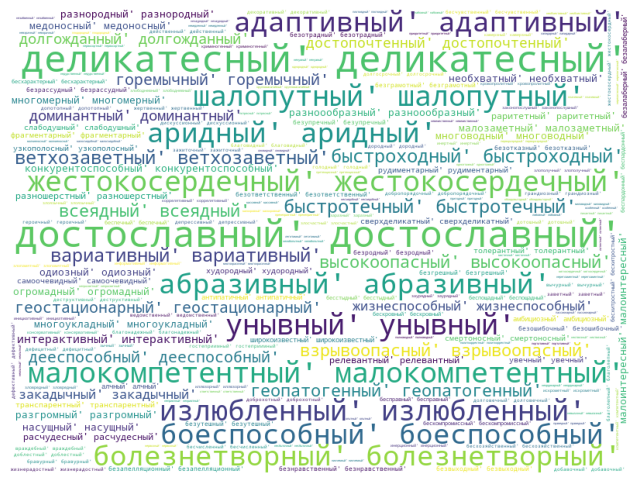

In [67]:
plt.figure(figsize=(8, 8))
plt.imshow(word_cld)
plt.axis('off')
plt.show()

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [78]:
vector = CountVectorizer()
vector.fit(df.другой.apply(lambda x: "".join(word + " " for word in x)))

CountVectorizer()

In [109]:
tfid = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,3), max_features=10)
tfid_matrix = tfid.fit_transform(df.другой.apply(lambda x: "".join(word + " " for word in x)))
tfid_matrix.shape

(2760405, 10)

In [115]:
tfid_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
df.shape

(2760405, 3)

In [117]:
from sklearn.cluster import KMeans

In [119]:
wgss = []

for i in range(1, 10):
    kmean = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=10)
    kmean.fit(tfid_matrix)
    wgss.append(kmean.inertia_)

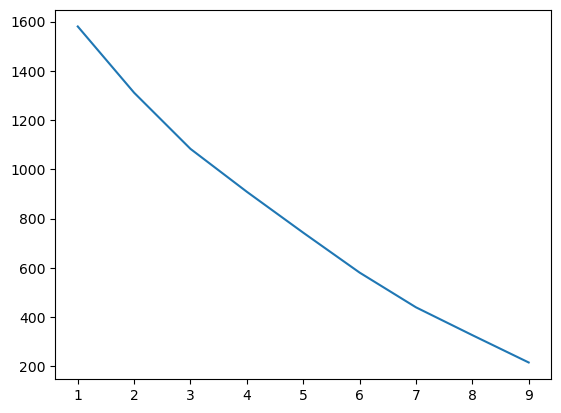

In [120]:
plt.plot(range(1, 10), wgss);
plt.show()

In [149]:
n_clusters = 7

In [151]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(tfid_matrix)

In [152]:
df["cluster"] = clusters

In [153]:
df["cluster"].value_counts()

cluster
0    2759259
2        269
3        228
6        180
1        166
5        162
4        141
Name: count, dtype: int64